In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

import arviz as az
import pymc as pm
import pytensor

from matplotlib import pyplot as plt
from pymc.distributions.timeseries import GaussianRandomWalk
from pytensor import tensor as T
from lifelines import KaplanMeierFitter

In [2]:
sw_tix = pd.read_csv('software_tickets.csv')

sw_tix.tail(2)

,prtspr_linked_ticket_final,key,labels,assignee_emailAddress,status_name,eng_assignee_active,eng_assignee_key,eng_hardware0_value,eng_hardware1_value,eng_hardware2_value,eng_location0_value,eng_location1_value,eng_location2_value,ict_components_0,ict_components_1,ict_components_2,ict_components,ict_description,ict_summary
2334,ICT-11530,PRTSPR-29834,NaN,software-jira@alma.cl,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07 Operations Software Support,NaN,NaN,07 Operations Software Support,This ticket has a a purpose to determine the e...,Patch compilation and deployment procedure
2335,ICT-19106,PRTSPR-52452,NaN,software-jira@alma.cl,Closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03 Control,NaN,NaN,03 Control,At [https://jira.alma.cl/browse/PRTSPR-52165 |...,"MountController thread (apparently) stuck, not..."


In [3]:
sw_tix_svl = sw_tix[['ict_components','ICT_time_span_days','ICT_resolution_name']].dropna()
sw_tix_svl['Resolution Code'] = sw_tix_svl['ICT_resolution_name'].map({"Fixed":1,
                                                                        "Verified":1,
                                                                        "Duplicate":0,
                                                                        "Rejected":0,
                                                                        "Validated":1,
                                                                        "Cannot Reproduce":0,
                                                                        "Done":1,
                                                                        "Incomplete":0,
                                                                        "Won't Do":0}
                                                                        )

sw_tix_svl['Resolution Code Bool'] = sw_tix_svl['ICT_resolution_name'].map({"Fixed":True,
                                                                        "Verified":True,
                                                                        "Duplicate":False,
                                                                        "Rejected":False,
                                                                        "Validated":True,
                                                                        "Cannot Reproduce":False,
                                                                        "Done":True,
                                                                        "Incomplete":False,
                                                                        "Won't Do":False}
                                                                        )
sw_tix_svl.head(5)

KeyError: "['ICT_time_span_days', 'ICT_resolution_name'] not in index"

Text(0, 0.5, 'Probability of Resolution')

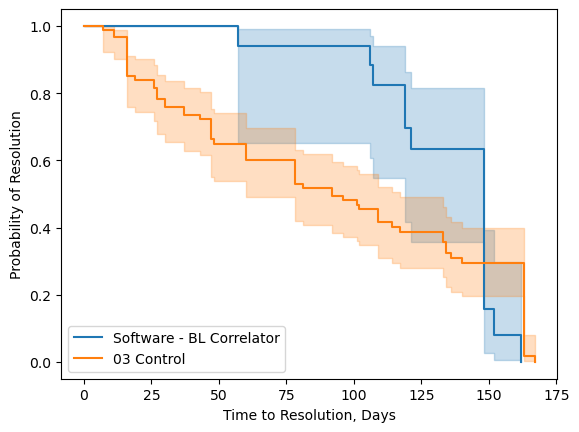

In [ ]:
sw_tix_svl_bl_corr = sw_tix_svl.query("ict_components == '03-02 Baseline Correlator' & ICT_time_span_days < 180")
sw_tix_svl_ctrl = sw_tix_svl.query("ict_components == '03 Control' & ICT_time_span_days < 180")


durations_bl_corr = sw_tix_svl_bl_corr['ICT_time_span_days']
resolution_bl_corr = sw_tix_svl_bl_corr['Resolution Code']
resolution_bool_bl_corr = sw_tix_svl_bl_corr['Resolution Code Bool']

durations_ctrl = sw_tix_svl_ctrl['ICT_time_span_days']
resolution_ctrl = sw_tix_svl_ctrl['Resolution Code']
resolution_bool_ctrl = sw_tix_svl_ctrl['Resolution Code Bool']

kmf_bl_corr = KaplanMeierFitter(label="Software - BL Correlator")
kmf_bl_corr.fit(durations_bl_corr, resolution_bool_bl_corr)
kmf_ctrl_corr = KaplanMeierFitter(label="03 Control")
kmf_ctrl_corr.fit(durations_ctrl, resolution_bool_ctrl)

#kmf.survival_function_
#kmf.cumulative_density_
kmf_bl_corr.plot_survival_function() #Plot cumultative density
kmf_ctrl_corr.plot_survival_function() #Plot cumultative density
#kmf.plot_cumulative_density()
plt.xlabel("Time to Resolution, Days")
plt.ylabel("Probability of Resolution")

In [ ]:
eng_hw = pd.read_csv('eng_tickets.csv')
eng_hw['IR_resolutiondate'] = pd.to_datetime(eng_hw.IR_resolutiondate)
eng_hw['IR_created'] = pd.to_datetime(eng_hw.IR_created)
pd.set_option('display.max_columns', None)

eng_hw.head(20)

,ticket,prtspr_linked_ticket_final,key,labels,assignee_emailAddress,status_name,eng_assignee_active,eng_assignee_key,eng_hardware,eng_location,ict_components,PR_fields_resolutiondate,PR_fields_created,PR_time_span_days,IR_resolution_name,IR_resolutiondate,IR_created,IR_time_span_days,ICT_resolution_name,ICT_fields_resolutiondate,ICT_fields_created,ICT_time_span_days,ir_description,re_sentence1
0,PRTSPR-38420,PRTSIR-14366,PRTSPR-38420,NaN,ade-amg-supervisors@alma.cl,Closed,True,ade-amg-supervisors@alma.cl,DV07,FE62,NaN,NaN,NaN,NaN,Fixed,2019-01-23 09:36:41+00:00,2019-01-22 18:51:28+00:00,0.0,NaN,NaN,NaN,NaN,dv07TrecXpol.png|width=750!\n \n! dv07TsysXpol...,"[""dv07TrecXpol.png|width=750!""]"
1,PRTSPR-55423,PRTSIR-18629,PRTSPR-55423,NaN,alma-aog@alma.cl,Closed,True,ade-planners,AOS TB,ACA Correlator Control Computers,NaN,NaN,NaN,NaN,Fixed,2022-01-24 16:08:05+00:00,2022-01-24 16:05:45+00:00,0.0,NaN,NaN,NaN,NaN,This happened after FSR. Error messge:\n\n\n\n...,"[""This happened after FSR. Error messge:""]"
2,PRTSPR-20426,PRTSIR-10094,PRTSPR-20426,NaN,ade-amg-supervisors@alma.cl,Resolved,True,ltiticho@alma.cl,DA51,Cryostat,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,We have received several alarms related to CRY...,"[""We have received several alarms related to C..."
3,PRTSPR-24250,PRTSIR-11008,PRTSPR-24250,NaN,rodrigo.guarda@alma.cl,Closed,True,clopez@alma.cl,DV15,Antenna ACU.Antenna Elevation Drive,NaN,NaN,NaN,NaN,Fixed,2017-05-28 13:55:43+00:00,2017-01-13 15:11:57+00:00,134.0,NaN,NaN,NaN,NaN,"While observing, antenna DV15 ""Mount"" was lost...","[""While observing, antenna DV15 \""Mount\"" was ..."
4,PRTSPR-57790,PRTSIR-19088,PRTSPR-57790,NaN,claudio.follert@alma.cl,Resolved,True,cfollert,DA56,LORR,NaN,NaN,NaN,NaN,Fixed,2022-09-12 14:14:59+00:00,2022-05-17 17:36:23+00:00,117.0,NaN,NaN,NaN,NaN,APE2: crc-21 almaop:/mnt/gns/data2/users/almao...,"[""APE2: crc-21 almaop:/mnt/gns/data2/users/alm..."
5,PRTSPR-61917,PRTSIR-19880,PRTSPR-61917,NaN,ade-amg-supervisors@alma.cl,Resolved,True,cguerra@alma.cl,DA65,Antenna ACU,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,"after the cloudsat we resume observations, but...","[""after the cloudsat we resume observations, b..."
6,PRTSPR-57299,PRTSIR-19008,PRTSPR-57299,NaN,ade-amg-supervisors@alma.cl,Closed,True,ade-amg-supervisors@alma.cl,PM03,DTS fiber (FOAD->CORR),NaN,NaN,NaN,NaN,Fixed,2022-04-27 15:51:06+00:00,2022-04-26 18:40:43+00:00,0.0,NaN,NaN,NaN,NaN,_maybe related with PM03 show no autocorrelati...,"[""_maybe related with PM03 show no autocorrela..."
7,PRTSPR-24129,PRTSIR-11008,PRTSPR-24129,NaN,hector.marroquin@alma.cl,Closed,True,clopez@alma.cl,DV15,Antenna ACU.Antenna Elevation Drive,NaN,NaN,NaN,NaN,Fixed,2017-05-28 13:55:43+00:00,2017-01-13 15:11:57+00:00,134.0,NaN,NaN,NaN,NaN,"While observing, antenna DV15 ""Mount"" was lost...","[""While observing, antenna DV15 \""Mount\"" was ..."
8,PRTSPR-37422,PRTSIR-14176,PRTSPR-37422,NaN,ade-amg-supervisors@alma.cl,Closed,True,ade-amg-supervisors@alma.cl,CM05,WCA3,NaN,NaN,NaN,NaN,Won't Fix,2018-12-13 11:52:02+00:00,2018-11-29 18:48:57+00:00,13.0,NaN,NaN,NaN,NaN,NaN,NaN
9,PRTSPR-60667,PRTSIR-19688,PRTSPR-60667,NaN,hector.marroquin@alma.cl,Resolved,True,hmarroqu@alma.cl,DA62,Antenna Azimuth Drive,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,"_!DA62_az.png|width=842,height=558!_","[""_!DA62_az.png|width=842,height=558!_""]"


In [ ]:
eng_hw.dtypes

ticket                                     object
prtspr_linked_ticket_final                 object
key                                        object
labels                                     object
assignee_emailAddress                      object
status_name                                object
eng_assignee_active                          bool
eng_assignee_key                           object
eng_hardware                               object
eng_location                               object
ict_components                            float64
PR_fields_resolutiondate                   object
PR_fields_created                          object
PR_time_span_days                         float64
IR_resolution_name                         object
IR_resolutiondate             datetime64[ns, UTC]
IR_created                    datetime64[ns, UTC]
IR_time_span_days                         float64
ICT_resolution_name                       float64
ICT_fields_resolutiondate                 float64


In [ ]:
eng_hw_svl = eng_hw[['eng_hardware','IR_time_span_days','IR_resolution_name']].dropna()
eng_hw_svl['Resolution Code'] = eng_hw_svl['IR_resolution_name'].map({"Fixed":1,
                                                                        "Cannot Reproduce":0,
                                                                        "Transfer":0,
                                                                        "Duplicate":0,
                                                                        "Unresolved":0,
                                                                        "Won't Fix":0,
                                                                        "Done":1,
                                                                        "Incomplete":0,
                                                                        "Won't Do":0}
                                                                        )

eng_hw_svl['Resolution Code Bool'] = eng_hw_svl['IR_resolution_name'].map({"Fixed":True,
                                                                        "Cannot Reproduce":False,
                                                                        "Transfer":False,
                                                                        "Duplicate":False,
                                                                        "Unresolved":False,
                                                                        "Won't Fix":False,
                                                                        "Done":True,
                                                                        "Incomplete":False,
                                                                        "Won't Do":False}
                                                                        )
eng_hw_svl

,eng_hardware,IR_time_span_days,IR_resolution_name,Resolution Code,Resolution Code Bool
0,DV07,0.0,Fixed,1,True
1,AOS TB,0.0,Fixed,1,True
3,DV15,134.0,Fixed,1,True
4,DA56,117.0,Fixed,1,True
6,PM03,0.0,Fixed,1,True
...,...,...,...,...,...
7520,DV24,0.0,Fixed,1,True
7522,DA50,715.0,Fixed,1,True
7523,OSF PPS Facility,81.0,Fixed,1,True
7524,DA60,7.0,Fixed,1,True


In [ ]:
#eng_hw_svl_ant = eng_hw_svl.query("eng_hardware.str.match('^([A-Z]{2}[0-9]{2})$')")
eng_hw_svl_ant_dv = eng_hw_svl.query("eng_hardware.str.match('^([DV]{2}[0-9]{2})$') & IR_time_span_days < 180")
eng_hw_svl_ant_cm = eng_hw_svl.query("eng_hardware.str.match('^([CM]{2}[0-9]{2})$') & IR_time_span_days < 180")
eng_hw_svl_ant_da = eng_hw_svl.query("eng_hardware.str.match('^([DA]{2}[0-9]{2})$') & IR_time_span_days < 180")
eng_hw_svl_ant_pm = eng_hw_svl.query("eng_hardware.str.match('^([PM]{2}[0-9]{2})$') & IR_time_span_days < 180")
eng_hw_svl_ant_dv

,eng_hardware,IR_time_span_days,IR_resolution_name,Resolution Code,Resolution Code Bool
0,DV07,0.0,Fixed,1,True
3,DV15,134.0,Fixed,1,True
7,DV15,134.0,Fixed,1,True
10,DV15,134.0,Fixed,1,True
16,DV09,175.0,Won't Fix,0,False
...,...,...,...,...,...
7431,DV01,0.0,Fixed,1,True
7432,DV09,68.0,Fixed,1,True
7442,DV23,0.0,Fixed,1,True
7454,DV18,1.0,Cannot Reproduce,0,False


Text(0, 0.5, 'Probability of Resolution')

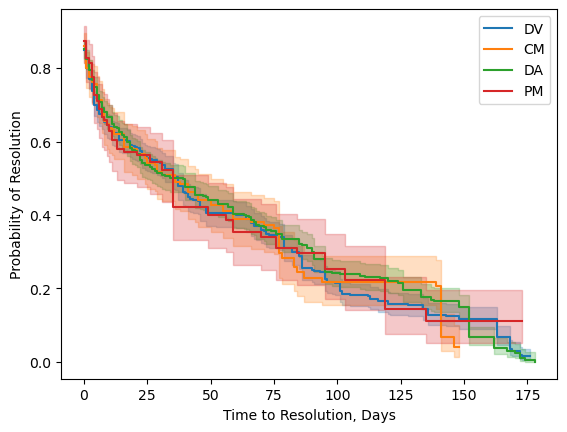

In [ ]:
from lifelines import KaplanMeierFitter

durations_dv = eng_hw_svl_ant_dv['IR_time_span_days']
resolution_dv = eng_hw_svl_ant_dv['Resolution Code']
resolution_bool_dv = eng_hw_svl_ant_dv['Resolution Code Bool']

durations_cm = eng_hw_svl_ant_cm['IR_time_span_days']
resolution_cm = eng_hw_svl_ant_cm['Resolution Code']
resolution_bool_cm = eng_hw_svl_ant_cm['Resolution Code Bool']

durations_da = eng_hw_svl_ant_da['IR_time_span_days']
resolution_da = eng_hw_svl_ant_da['Resolution Code']
resolution_bool_da = eng_hw_svl_ant_da['Resolution Code Bool']

durations_pm = eng_hw_svl_ant_pm['IR_time_span_days']
resolution_pm = eng_hw_svl_ant_pm['Resolution Code']
resolution_bool_pm = eng_hw_svl_ant_pm['Resolution Code Bool']

kmf_dv = KaplanMeierFitter(label="DV")
kmf_cm = KaplanMeierFitter(label="CM")
kmf_da = KaplanMeierFitter(label="DA")
kmf_pm = KaplanMeierFitter(label="PM")
kmf_dv.fit(durations_dv, resolution_bool_dv)
kmf_cm.fit(durations_cm, resolution_bool_cm)
kmf_da.fit(durations_da, resolution_bool_da)
kmf_pm.fit(durations_pm, resolution_bool_pm)


#kmf.survival_function_
#kmf.cumulative_density_
kmf_dv.plot_survival_function() #Plot cumultative density
kmf_cm.plot_survival_function()
kmf_da.plot_survival_function()
kmf_pm.plot_survival_function()
#kmf.plot_cumulative_density()
plt.xlabel("Time to Resolution, Days")
plt.ylabel("Probability of Resolution")

Text(0.5, 0, 'time $t$')

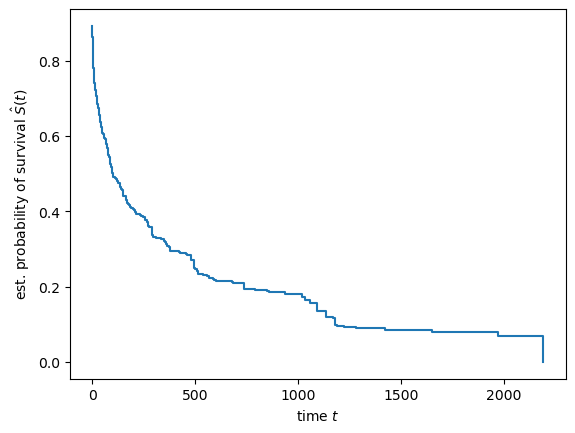

In [ ]:
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(resolution_bool, durations)
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

